# An Autoencoder for MNIST

In [ ]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt

from torch.utils.data import DataLoader
from torchvision.datasets import MNIST
from torchvision.transforms import ToTensor


In [40]:
transform = ToTensor()

train_ds = MNIST("data/", train=True, download=True, transform=transform)
test_ds = MNIST("data/", train=False, download=True, transform=transform)

In [26]:
train_ds[0][0]

tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,

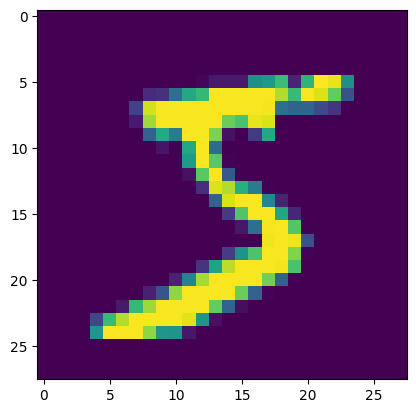

In [35]:
plt.imshow(train_ds[0][0].reshape(1,28,28).numpy().squeeze())

In [36]:
nn.Flatten(start_dim=1)(torch.arange(9).reshape(3,3))

tensor([[0, 1, 2],
        [3, 4, 5],
        [6, 7, 8]])

In [ ]:
class AutoEncoder(nn.Module):
    def __init__(self):
        super().__init__()
        self.encoder = nn.Sequential(
            # shape: (N,1,28,28)
            nn.Conv2d(1, 8, (5,5), padding=2),
            # shape: (N,8,28,28)
            nn.MaxPool2d((2,2)),
            # shape: (N,8,14,14)
            nn.ReLU(),
            # shape: (N,8,14,14)
            nn.Conv2d(8, 8, (5,5), padding=2),
            # shape: (N,8,14,14)
            nn.MaxPool2d((2,2)),
            # shape: (N,8,7,7)
            nn.ReLU(),
            # shape: (N,8,7,7)
            nn.Flatten(),
            # shape: (N,392)
            nn.Linear(392, 64),
            nn.ReLU(),
            nn.Linear(64, 8),
            nn.Tanh()
        )

        self.decoder = nn.Sequential(

        )
    
    def forward(self, x):
        x = self.encoder(x)
        return x

In [39]:
model = AutoEncoder()

model(train_ds[0][0].unsqueeze(0))

tensor([[ 0.0749,  0.0021,  0.0903,  0.0290,  0.1068,  0.1355, -0.0923,  0.1110]],
       grad_fn=<TanhBackward0>)